In [232]:
#Import dependencies
import pandas as pd
from pathlib import Path
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sklearn for Linear Regression
from sklearn.linear_model import LinearRegression

In [233]:
#Read data into a dataframe
data = pd.read_csv(Path('./second_dataset.csv'))
df = pd.DataFrame(data)

In [234]:
#Drop insignificant columns
df1 = df.drop(columns=['key', 'mode', 'time_signature'])

In [235]:
#Top popular songs with high popularity
top = df1[df1['popularity']>90].sort_values('popularity', ascending = False)
top

,artist_name,track_id,track_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
0,Kali Uchis,6tDDoYIxWvMLTdKpjFkc1B,telepatía,0.1120,0.653,0.524,0.00000,0.2030,-9.016,0.0502,83.970,0.5530,97,160.0
5000,Ariana Grande,4kV4N9D1iKVxx1KLvtTpjS,"break up with your girlfriend, i'm bored",0.0421,0.726,0.554,0.00000,0.1060,-5.290,0.0917,169.999,0.3350,97,190.0
5001,Ariana Grande,14msK75pk3pA33pzPVNtBF,7 rings,0.5780,0.725,0.321,0.00000,0.0884,-10.744,0.3230,70.142,0.3190,96,179.0
1,Ariana Grande,35mvY5S1H3J2QZyna3TFe0,positions,0.4680,0.737,0.802,0.00000,0.0931,-4.771,0.0878,144.015,0.6820,92,172.0
5002,Cardi B,0PG9fbaaHFHfre2gUVo7AN,Please Me,0.0642,0.747,0.570,0.00000,0.0832,-6.711,0.0810,133.992,0.6500,92,201.0
5003,Billie Eilish,4QIo4oxwzzafcBWkKjDpXY,xanny,0.7780,0.512,0.128,0.00118,0.2770,-17.827,0.3130,109.102,0.0473,91,244.0


In [236]:
# Sort values by popularity. Get the values with popularity higher than 70 to test the relationship between variables
most = df1[df1['popularity']>70].sort_values('popularity', ascending = False)
most.head()

,artist_name,track_id,track_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration
0,Kali Uchis,6tDDoYIxWvMLTdKpjFkc1B,telepatía,0.1120,0.653,0.524,0.0,0.2030,-9.016,0.0502,83.970,0.553,97,160.0
5000,Ariana Grande,4kV4N9D1iKVxx1KLvtTpjS,"break up with your girlfriend, i'm bored",0.0421,0.726,0.554,0.0,0.1060,-5.290,0.0917,169.999,0.335,97,190.0
5001,Ariana Grande,14msK75pk3pA33pzPVNtBF,7 rings,0.5780,0.725,0.321,0.0,0.0884,-10.744,0.3230,70.142,0.319,96,179.0
1,Ariana Grande,35mvY5S1H3J2QZyna3TFe0,positions,0.4680,0.737,0.802,0.0,0.0931,-4.771,0.0878,144.015,0.682,92,172.0
5002,Cardi B,0PG9fbaaHFHfre2gUVo7AN,Please Me,0.0642,0.747,0.570,0.0,0.0832,-6.711,0.0810,133.992,0.650,92,201.0


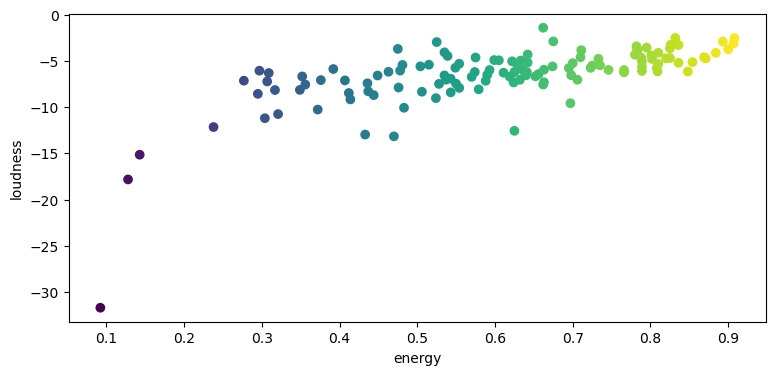

In [237]:
#Scatter plot for the smaller sample to see the relationship between energy and loudness
plt.figure(figsize=(9,4))
plt.scatter(most.energy, most.loudness, c=most.energy)
plt.xlabel('energy')
plt.ylabel('loudness')
plt.show()

In [238]:
#Reshape the data for Scikit requirements
X = most.energy.values.reshape(-1, 1)
X[:5]
X.shape

(126, 1)

In [239]:
#Assign loudness to y
y = most.loudness

In [240]:
#create an instance of the linear regression model
model = LinearRegression()
#fit
model.fit(X, y)


LinearRegression()

In [241]:
#generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(126,)


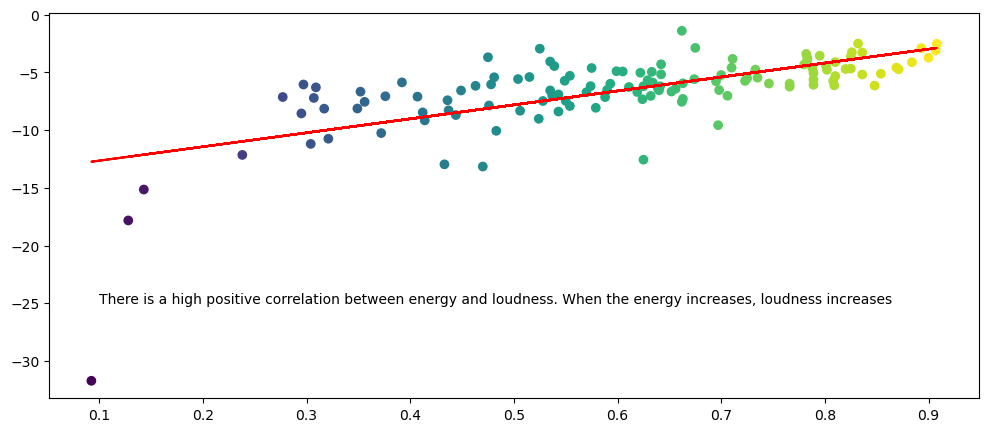

In [248]:
# plot the predictions as a red line against the data points
plt.figure(figsize=(12,5))
plt.scatter(X, y, c=most.energy)
plt.plot(X, y_pred, color='red')
plt.text(0.1, -25,'There is a high positive \
correlation between energy and loudness. When the energy increases, loudness increases')
plt.show()

In [190]:
#Finding correlation between more than two variables using pearson

In [249]:
#Assigning pearson method to corr variable 
corr = df1.corr(method="pearson")

In [250]:
#Unstack and drop null values
upper_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
clean_corr = upper_corr.unstack().dropna()

In [230]:
sorted_cor = clean_corr.sort_values()
print(sorted_cor)

energy            acousticness       -0.705074
loudness          acousticness       -0.561542
                  instrumentalness   -0.430718
danceability      acousticness       -0.303510
instrumentalness  danceability       -0.270541
valence           instrumentalness   -0.249673
popularity        instrumentalness   -0.243189
instrumentalness  energy             -0.238526
popularity        acousticness       -0.227650
tempo             acousticness       -0.203529
duration          valence            -0.154898
                  danceability       -0.152216
speechiness       instrumentalness   -0.147659
valence           acousticness       -0.141417
liveness          danceability       -0.139337
duration          speechiness        -0.138621
speechiness       loudness           -0.061264
tempo             instrumentalness   -0.061095
liveness          instrumentalness   -0.047527
popularity        liveness           -0.041998
                  speechiness        -0.029864
tempo        

Text(0.5, 1.0, 'Correlation Heatmap')

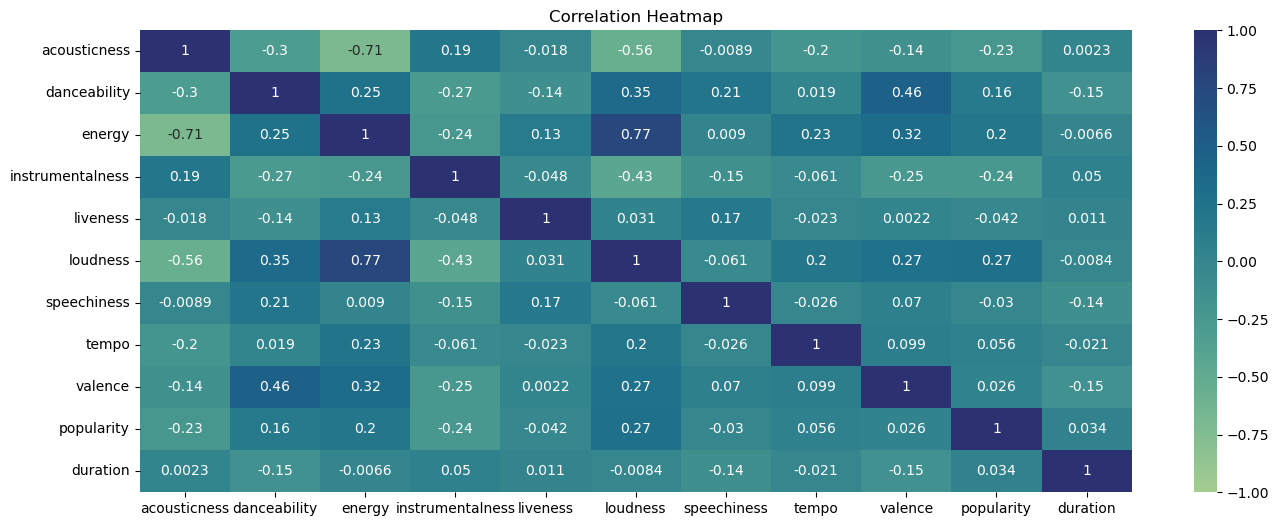

In [251]:
#Correlation Heatmap
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df1.corr(method='pearson'),cmap="crest",vmin=-1, vmax=1, annot=True, linecolor='Black')
ax.set(xlabel="", ylabel="")
ax.set_title("Correlation Heatmap", fontdict={'fontsize':12})

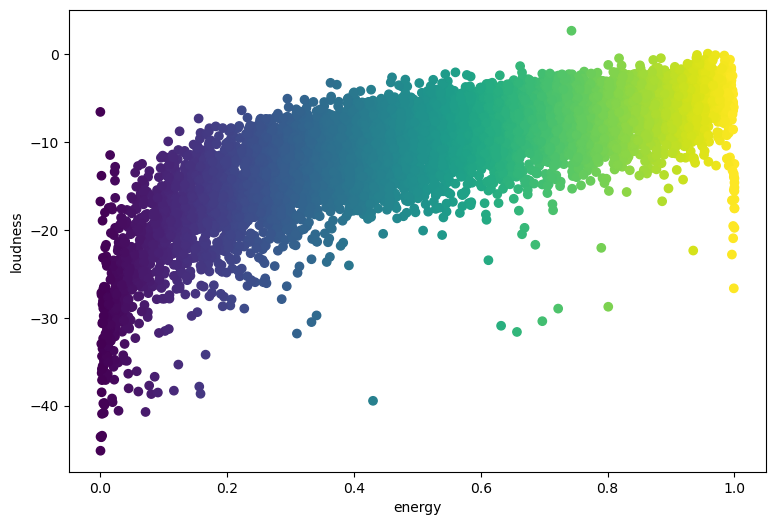

In [252]:
#Scatter plot: energy and loudness
#Using the whole dataset to confirm the positive correlation between energy and loudness
plt.figure(figsize=(9,6))
plt.scatter(df1.energy, df1.loudness, c=df1.energy)
plt.xlabel('energy')
plt.ylabel('loudness')
plt.show()


In [253]:
#Reshape the data for Scikit requirements
X = df1.energy.values.reshape(-1, 1)
X[:5]
X.shape

(9999, 1)

In [254]:
#Assign loudness to y
y = df1.loudness

In [255]:
#create an instance of the linear regression model
model = LinearRegression()
#fit
model.fit(X, y)


LinearRegression()

In [256]:
#generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(9999,)


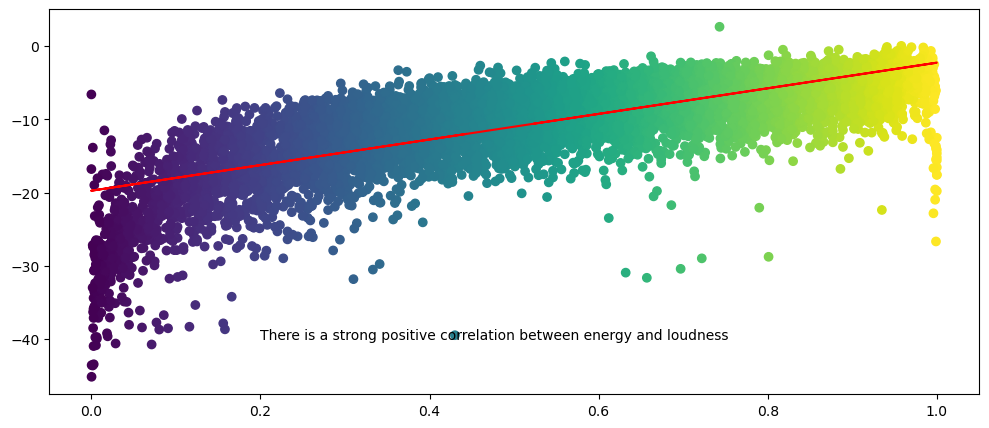

In [258]:
# plot the predictions as a red line against the data points
plt.figure(figsize=(12,5))
plt.scatter(X, y, c=df1.energy)
plt.plot(X, y_pred, color='red')
plt.text(0.2, -40, 'There is a strong positive correlation between energy and loudness')
plt.show()


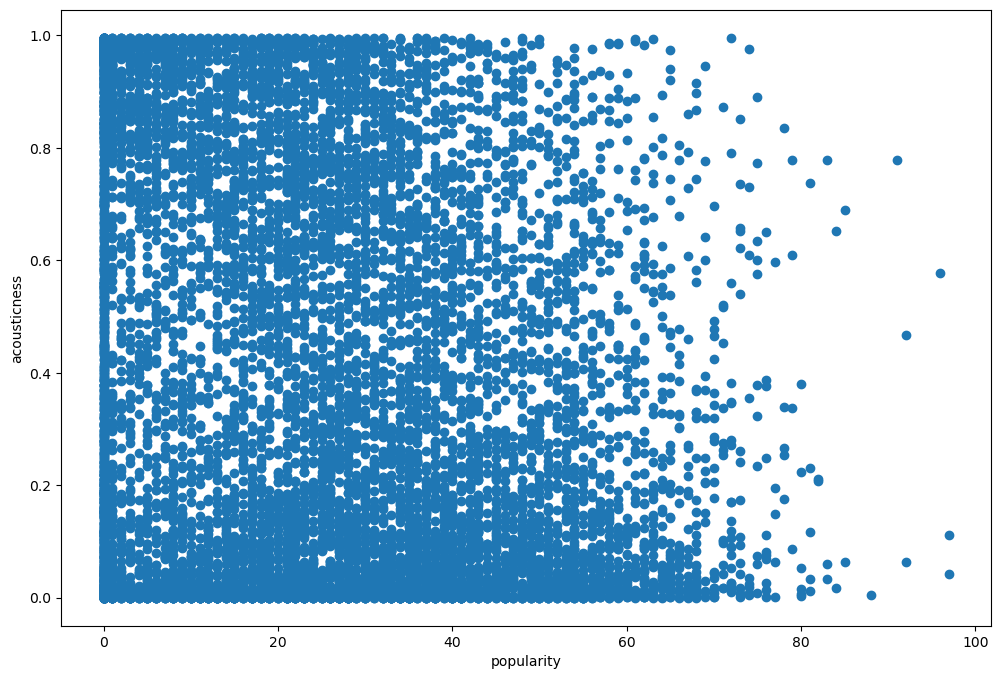

In [259]:
#Scatter plot: popularity and acousticness
plt.figure(figsize=(12,8))
plt.scatter(df1.popularity, df1.acousticness)
plt.xlabel('popularity')
plt.ylabel('acousticness')
plt.show()

In [260]:
#Reshape the data for Scikit requirements
X = df1.popularity.values.reshape(-1, 1)
X[:5]
X.shape

(9999, 1)

In [261]:
#Assign loudness to y
y = df1.acousticness

In [262]:
#create an instance of the linear regression model
model = LinearRegression()
#fit
model.fit(X, y)

LinearRegression()

In [263]:
#generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(9999,)


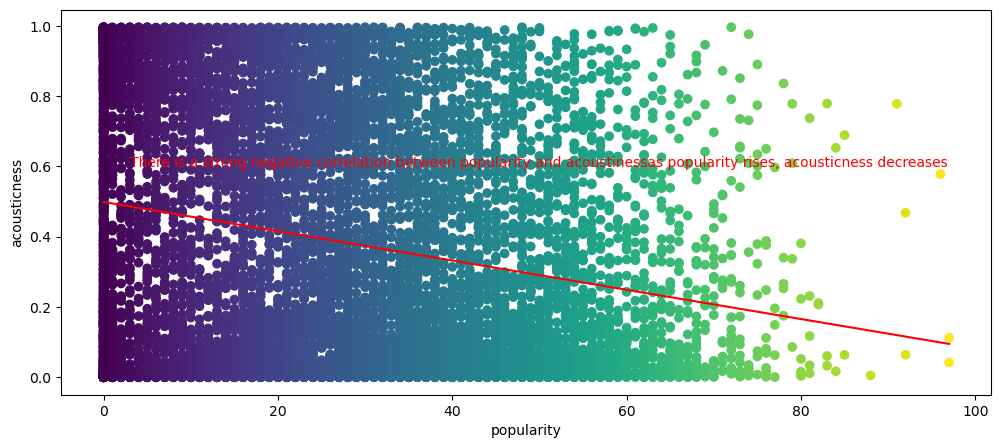

In [268]:
# plot the predictions as a red line against the data points to see the correlation between popularity and acousticness
plt.figure(figsize=(12,5))
plt.scatter(X, y, c=df1.popularity)
plt.xlabel('popularity')
plt.ylabel('acousticness')
plt.plot(X, y_pred, color='red')
plt.text(3, 0.6, 'There is a strong negative correlation between popularity and acoustiness\
as popularity rises, acousticness decreases', color='red')
plt.show()


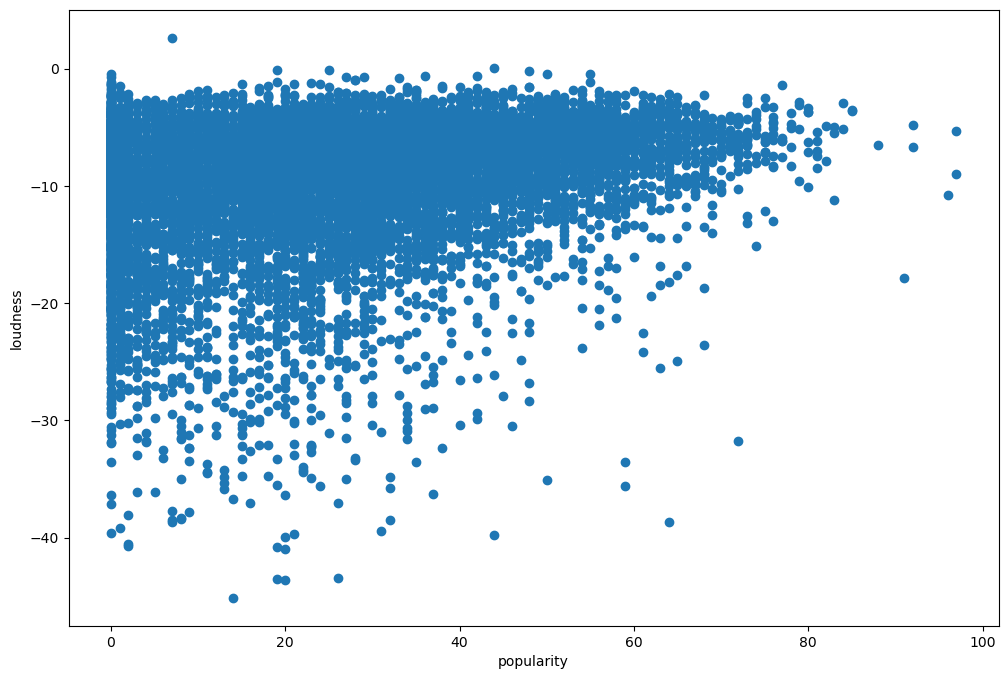

In [269]:
#Popularity vs Loudness
#Scatter plot: popularity and loudness
plt.figure(figsize=(12,8))
plt.scatter(df1.popularity, df1.loudness)
plt.xlabel('popularity')
plt.ylabel('loudness')
plt.show()

In [270]:
#Reshape the data for Scikit requirements
X = df1.popularity.values.reshape(-1, 1)
X[:5]
X.shape

(9999, 1)

In [271]:
#Assign loudness to y
y = df1.loudness

In [272]:
#create an instance of the linear regression model
model = LinearRegression()
#fit
model.fit(X, y)

LinearRegression()

In [273]:
#generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(9999,)


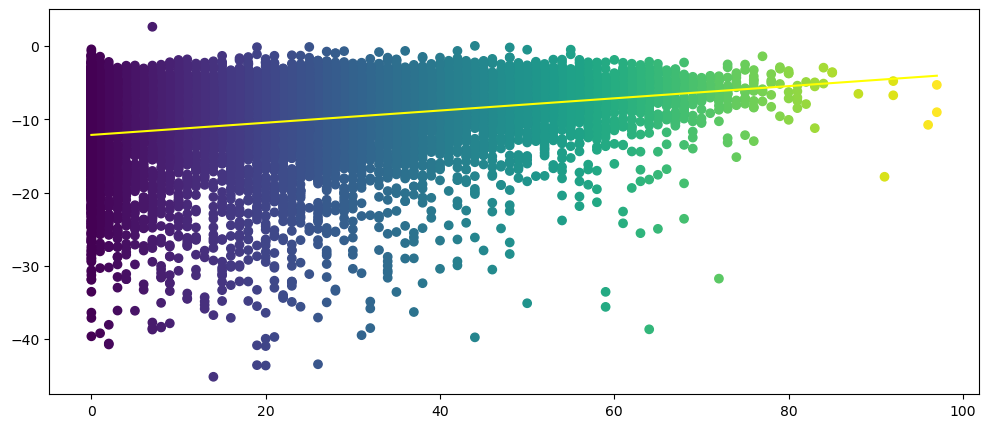

In [274]:
# plot the predictions as a red line against the data points
plt.figure(figsize=(12,5))
plt.scatter(X, y, c=df1.popularity)
plt.plot(X, y_pred, color='yellow')
plt.show()
